# Lecture 8: Principal Component Analysis and Kernel Principal Component Analysis

By courtesy of [askpython](https://www.askpython.com/python/examples/principal-component-analysis), [Sebastian Raschka](http://rasbt.github.io/mlxtend/user_guide/feature_extraction/RBFKernelPCA/), [Open Data Science](https://odsc.medium.com/implementing-a-kernel-principal-component-analysis-in-python-495f04a7f85f), and [Felix Muia](https://www.section.io/engineering-education/kernel-pca-in-python/).

## 1. Implement PCA from Scratch

Given a data matrix $\mathbf{X} \in \mathbb{R}^{M \times N}$, the goal of PCA is to identify the directions of maximum variance contained in the data. PCA is widely used in dimensionality reduction. In this section, we will implement PCA from scratch.

### 1.1 Subtract the Mean of Each Variable

First, we subtract the mean of each variable from the dataset so that the dataset is centered on the origin. This means we compute $\boldsymbol{\mu}=\frac{1}{M} \sum_i \mathbf{x}^{(i)}$ and replace each $\mathbf{x}^{(i)}$ with $\mathbf{x}^{(i)}-\boldsymbol{\mu}$.

In [1]:
# Importing required libraries
import numpy as np

# Generate a dummy dataset.
X = np.random.randint(10,50,100).reshape(20,5) 

# Mean-centering the data  
X_meaned = X - np.mean(X , axis = 0)

Data generated by the above code have dimensions $(20, 5)$, i.e., $20$ examples and $5$ features for each example. We calculated the mean of each variable and subtracted that from every row of the respective column.

### 1.2 Calculate the Covariance Matrix

Second, we calculate the covariance matrix of the mean-centered data. Given the mean-centered data matrix $\mathbf{X} \in \mathbb{R}^{M \times N}$, we can compute the covariance matrix $\boldsymbol{\Sigma}=\frac{1}{M} \mathbf{X}^T \mathbf{X}$.

In [2]:
# Calculating the covariance matrix of the mean-centered data
cov_mat = np.cov(X_meaned , rowvar = False)

We can easily calculate the covariance matrix using `numpy.cov( )` method.

### 1.3 Compute the Eigenvalues and Eigenvectors

Third, we compute the $M$ eigenvectors $\mathbf{v}_1, \ldots, \mathbf{v}_M$ of $\boldsymbol{\Sigma}$ where $\mathbf{v}_i \in \mathbb{R}^N$. The eigenvectors of the covariance matrix are orthogonal (mutually perpendicular) to each other and each vector represents a principal component. A larger eigenvalue corresponds to a higher variability. Hence the principal component with the higher eigenvalue will be a component capturing higher variability in the data.

In [3]:
# Calculating eigenvalues and eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

NumPy `linalg.eigh( )` method returns the eigenvalues and eigenvectors of a real symmetric matrix.

### 1.4 Sort Eigenvalues in Descending Order

Now, we sort the eigenvalues in descending order along with the corresponding eigenvectors. Remember each column in the eigenvector matrix corresponds to a principal component, so arranging them in descending order of their eigenvalues will automatically arrange the principal components in descending order of their variability. Hence the first column in our rearranged eigenvector matrix will be a principal component that captures the highest variability.

In [4]:
# Sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]

# Similarly, sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]


`np.argsort` returns an array of indices of the same shape.

### 1.5 Select a Subset from the Rearranged Eigenvalue Matrix

Then, we select the top $K$ eigenvectors $\mathbf{v}_1, \ldots, \mathbf{v}_K$ from the rearranged eigenvector matrix and stack them together into an $N \times K$ matrix $\mathbf{V}$. For example, when $K = 2$, we select the first two principal components $\mathbf{v}_1$ and $\mathbf{v}_2$.

In [5]:
# Select the first n eigenvectors, n is the desired dimension of our final reduced data
n_components = 2 
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

`n_components = 2` means our final data should be reduced to just two features. If we change it to $3$, we get our data reduced to three features.

### 1.6 Transform the Data

Finally, we transform the data by having a dot product between the eigenvector subset and the mean-centered data, i.e., $\mathbf{Z}=\mathbf{X} \mathbf{V}$. The outcome $\mathbf{Z}$ is the data that is reduced to lower dimensions from higher dimensions.

In [6]:
#Transform the data 
X_reduced = np.dot(X_meaned, eigenvector_subset)

The final dimensions of ``X_reduced`` will be $(20, 2)$ and the data was of higher dimensions $(20, 5)$ originally.

### 1.7 Complete Code

In [7]:
import numpy as np
 
def PCA(X, num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)

    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    
    ## If you want the exactly same results as sklearn's PCA, replace np.linalg.eigh(cov_mat) with linalg.svd(cov_mat).
    #from scipy import linalg
    #eigen_vectors, eigen_values, _ = linalg.svd(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(X_meaned, eigenvector_subset)
     
    return X_reduced

We defined a function named PCA accepting the data matrix and the number of components as input arguments. In the next subsection, we’ll use the IRIS dataset and apply our PCA function to it.

## 1.8 Apply PCA to IRIS Dataset

We should pre-center data wherever necessary before applying any ML algorithm to it. In the following code, we did so while defining our PCA function.

In [8]:
import pandas as pd
 
# Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
 
# Prepare the data
x = data.iloc[:,0:4]
 
# Prepare the target
target = data.iloc[:,4]
 
# Applying it to PCA function
mat_reduced = PCA(x , 2)
 
# Creating a pandas dataframe of reduced dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

Let’s plot our results using the `seaborn` and `matplotlib` libraries.

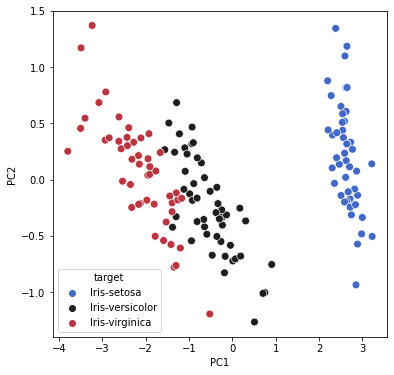

In [9]:
import seaborn
import matplotlib.pyplot as plt
 
plt.figure(figsize = (6, 6))
seaborn.scatterplot(data = principal_df, x = 'PC1' , y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')
plt.show()

## 1.9 Compare with Scikit-learn

Now, let's compare our PCA implementation with that of scikit-learn.

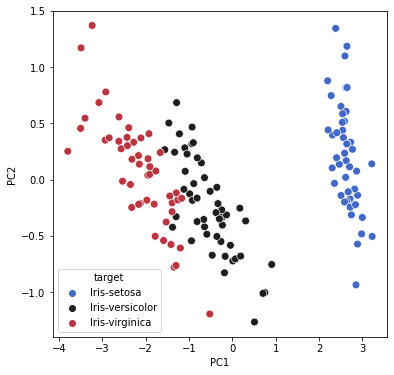

Time for running our PCA implementation: 0.00100 seconds.


In [10]:
# Our PCA implementation
import time
start = time.time()

mat_reduced = PCA(x , 2)
end = time.time()

principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)
plt.figure(figsize = (6,6))
seaborn.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')
plt.show()

print(f"Time for running our PCA implementation: {end-start:.5f} seconds.")

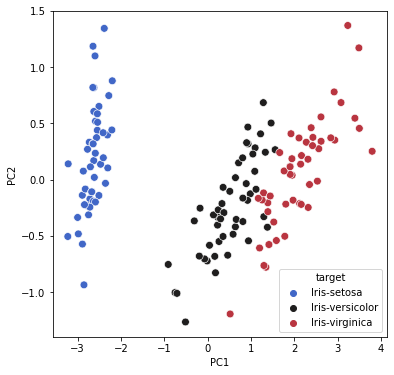

Time for running PCA of scikit-learn: 0.00299 seconds.


In [11]:
# Scikit-learn's PCA
import sklearn.decomposition
pca = sklearn.decomposition.PCA(n_components=2)

start = time.time()
pca.fit(x)
mat_reduced = pca.transform(x)
end = time.time()

principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)
plt.figure(figsize = (6,6))
seaborn.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')
plt.show()

print(f"Time for running PCA of scikit-learn: {end-start:.5f} seconds.")

The comparison shows that our implementation of PCA performs as well as scikit-learn's PCA and takes similar amount of time.

## 2. Implement KPCA from Scratch

If we are dealing with nonlinear problems, which we may encounter rather frequently in real-world applications, linear transformation techniques for dimensionality reduction such as PCA may not be the best choice. 

In this section, we will implement a kernelized version of PCA (or KPCA). Using KPCA, we will learn how to transform data that is not linearly separable onto a new, lower-dimensional subspace that is suitable for linear classifiers.

### 2.1 Computation of the Kernel (Similarity) Matrix
First of all, we need to calculate RBF kernel matrix:
$$
\mathcal{K}\left(\mathbf{x}^{(i)}, \mathbf{x}^{(j)}\right)=\exp \left(-\gamma\left\|\mathbf{x}^{(i)}-\mathbf{x}^{(j)}\right\|_{2}^{2}\right),
$$
for every pair of points. 

For example, if we have a dataset of $100$ samples, this step would result in a symmetric $100\times100$ kernel matrix.

### 2.2 Eigendecomposition of the Kernel Matrix

Since it is not guaranteed that the kernel matrix is centered, we can apply the following equation to do so:
$$
K^{\prime}=K-\mathbf{1}_{\mathbf{M}} K-K \mathbf{1}_{\mathbf{M}}+\mathbf{1}_{\mathbf{M}} K \mathbf{1}_{\mathbf{M}},
$$
where $\mathbf{1}_{\mathrm{M}}$ is (like the kernel matrix) an $M \times M$ matrix with all values equal to $\frac{1}{M}$[1].

[1] *B. Scholkopf, A. Smola, and K.-R. Muller. Nonlinear component analysis as a kernel eigenvalue problem. Neural computation, 10(5):1299–1319, 1998.*

Finally, we obtain the eigenvectors of the centered kernel matrix that correspond to the largest eigenvalues. Those eigenvectors are the data points already projected onto the respective principal components (see the second equation of the first line of Page 11 of Lecture Slide 8.2).

### 2.3 Complete Code for Our Implementation

Using some SciPy and NumPy helper functions, we implement the RBF KPCA as follows.

In [12]:
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh
import numpy as np 
from numpy import exp
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/Colab_Notebooks/lecture\ 8

def rbf_kernel_pca(X, gamma, n_components):

    """
    RBF kernel PCA implementation.    
    Parameters
    ------------
    X: {NumPy ndarray}, shape = [n_examples, n_features]  
    gamma: float
        Tuning parameter of the RBF kernel    
    n_components: int
        Number of principal components to return    
    Returns
    ------------
    X_pc: {NumPy ndarray}, shape = [n_examples, k_features]
        Projected dataset   
    """
    
    # 1. Calculate pairwise squared Euclidean distances in the mxn-dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')    
    
    # 2. Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists) 
    
    # 3. Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)    
    
    # 4. Center the kernel matrix.
    M = K.shape[0]
    one_n = np.ones((M,M)) / M
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)   
    
    # 5. Obtain eigenpairs from the centered kernel matrix. (scipy.linalg.eigh returns them in ascending order.)
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1] 

    # 6. Collect the top k eigenvectors (projected examples)
    X_pc = np.column_stack([eigvecs[:, i] * np.sqrt(eigvals[i])
                           for i in range(n_components)])   
    
    return X_pc

### 2.4 Apply Our RBF KPCA on a Nonlinear Example Dataset

Now, let us apply our RBF KPCA on a nonlinear example dataset. We will start by creating a two-dimensional dataset of $100$ example points. For illustration, the half-moon of triangle symbols will represent one class, and the half-moon depicted by the circle symbols will represent the examples from another class.

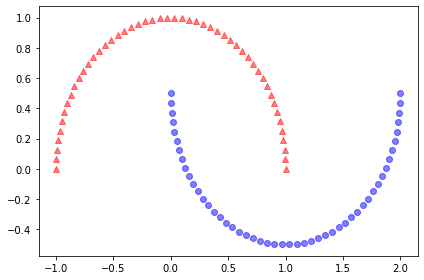

In [13]:
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt

X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y==0, 0], X[y==0, 1],
     color='red', marker='^', alpha=0.5)

plt.scatter(X[y==1, 0], X[y==1, 1],
     color='blue', marker='o', alpha=0.5)

plt.tight_layout()
plt.show()

These two half-moon shapes are not linearly separable, and our goal is to unfold the half-moons via KPCA so that the dataset can serve as a suitable input for a linear classifier. But first, let’s see how the dataset looks if we project it onto the principal components via standard PCA.

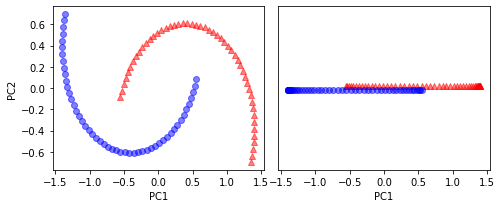

In [14]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1],
               color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1],
               color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02,
               color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02,
               color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

We can see in the resulting figures that a linear classifier would be unable to perform well on the dataset transformed via standard PCA.

Now, let’s try out our kernel PCA function, ``rbf_kernel_pca``.

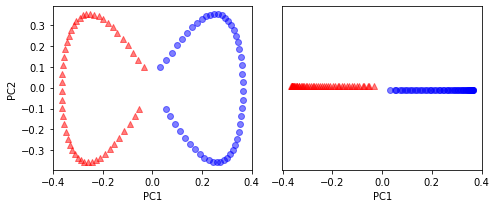

In [15]:
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
               color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
               color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02,
               color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
               color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

We can now see that the two classes (circles and triangles) are linearly well separated so that we have a suitable training dataset for linear classifiers.

### 2.5 Comparison of Our KPCA Implementation with Scikit-learn's

In this subsection, we will compare our RBF KPCA implementation with that of scikit-learn. 

The below code applies scikit-learn's RBF KPCA on the example dataset.

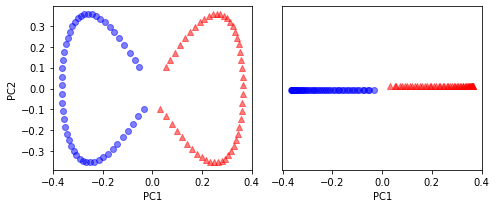

Time for running KPCA of scikit-learn: 0.006 seconds.


In [16]:
import time
from sklearn.decomposition import PCA, KernelPCA

# RBF kernel PCA of scikit-learn
start = time.time()
kpca_skl = KernelPCA(kernel="rbf", gamma=15)
X_kpca_skl = kpca_skl.fit_transform(X)
end = time.time()

# Plot KPCA features
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca_skl[y==0, 0], X_kpca_skl[y==0, 1],
               color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca_skl[y==1, 0], X_kpca_skl[y==1, 1],
               color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca_skl[y==0, 0], np.zeros((50,1))+0.02,
               color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca_skl[y==1, 0], np.zeros((50,1))-0.02,
               color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()
print(f"Time for running KPCA of scikit-learn: {end-start:.3f} seconds.")

Next, we apply our RBF KPCA implementation on the same dataset.

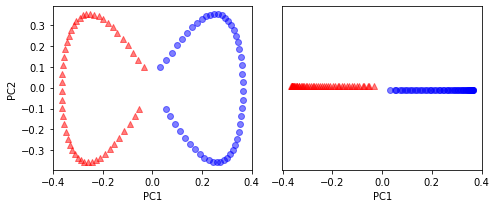

Time for running our KPCA implementation: 0.002 seconds.


In [17]:
# Our implementation of RBF kernel PCA
start = time.time()
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
end = time.time()

# Plot KPCA features
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1],
               color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1],
               color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50,1))+0.02,
               color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50,1))-0.02,
               color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

print(f"Time for running our KPCA implementation: {end-start:.3f} seconds.")

The comparison shows that our RBF KPCA implementation performs as well as scikit-learn's RBF KPCA and takes similar amount of time.